In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris = datasets.load_iris()
data = iris.data  
data[:4, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [3]:
data.shape

(150, 4)

Our `data` is a $n \times p$ matrix where `n` is the number of samples or data points and `p` is the number of features for each data point. In case of Iris dataset, we have 150 data points (n) and 4 features (p).

In [4]:
pca = PCA()
iris_pca = pca.fit_transform(data)

# explained_variance_ratio_ is an important measure to determine how many
# components we want to keep
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [5]:
# Cumulative sum of variance is of course 1
print(pca.explained_variance_ratio_.sum())

1.0


In [6]:
components = pd.DataFrame(pca.components_, columns=iris.feature_names);
components

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


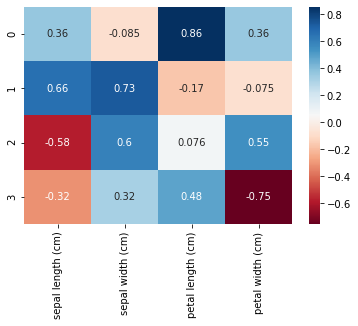

In [7]:
sns.heatmap(components, cmap='RdBu', annot=True)
plt.show()

In [8]:
# Appaly scaling (without scaling one feature might influence 
# the outcome more than another)
data = StandardScaler().fit_transform(data)

In [9]:
# Scaled data has zero mean and unit variance
data[:4, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

In [10]:
iris_pca_sc = pca.fit_transform(data)
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


In [11]:
components = pd.DataFrame(pca.components_, columns=iris.feature_names)

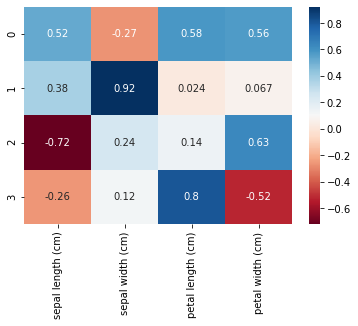

In [12]:
sns.heatmap(components, cmap='RdBu', annot=True)
plt.show()

In [13]:
# let's choose first two priciple components
pca = PCA(n_components=2)

In [14]:
components = pca.fit_transform(data);

In [15]:
df = pd.DataFrame(components)

In [16]:
df['target'] = iris.target

In [17]:
df

,0,1,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2
